In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
import warnings # Setting the warnings to be ignored 
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv("Mall_Customers.csv")

In [101]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [103]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [104]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

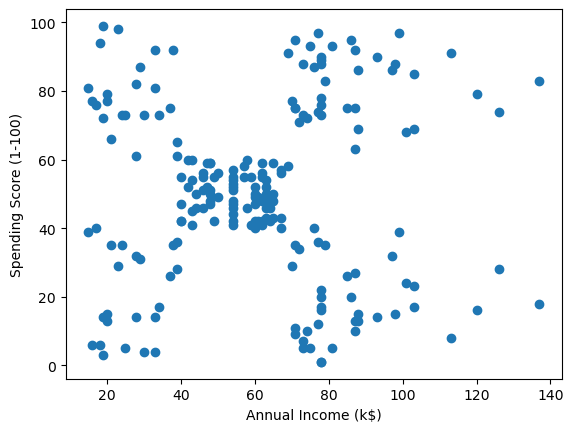

In [105]:
plt.scatter("Annual Income (k$)", "Spending Score (1-100)", data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

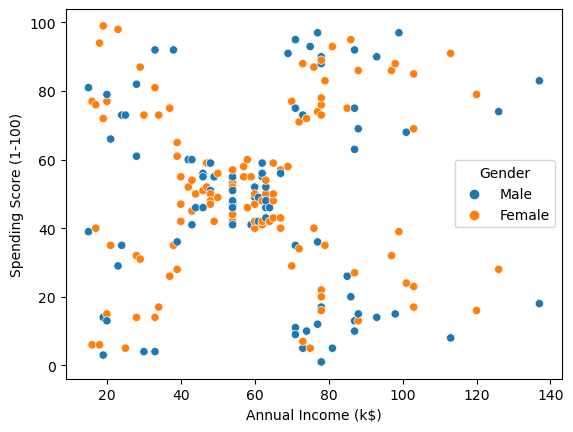

In [106]:
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue='Gender')

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

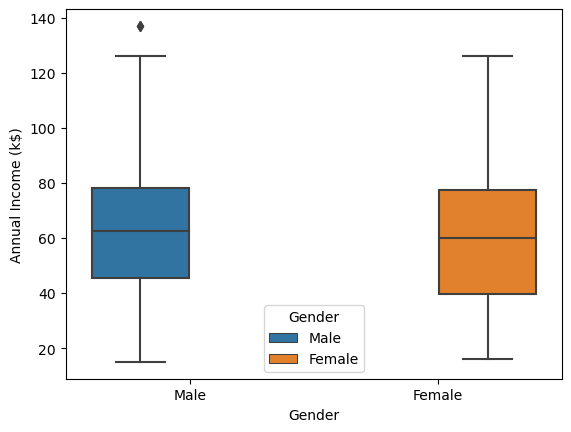

In [107]:
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', hue='Gender')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

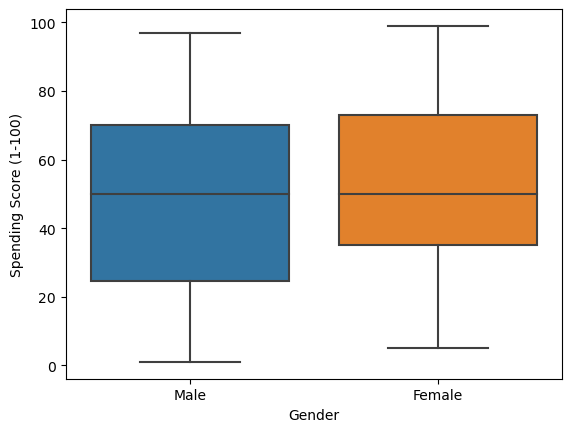

In [108]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')

In [109]:
df_updated = df.drop('CustomerID', axis='columns')
df_updated

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [110]:
df_updated_1 = pd.get_dummies(df_updated['Gender'])
df_updated_1

,Female,Male
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
195,True,False
196,True,False
197,False,True
198,False,True


In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df_updated['Gender'])

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [112]:
df_updated['Gender'] = le.fit_transform(df_updated['Gender'])

In [113]:
df_updated

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [114]:
df_updated.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

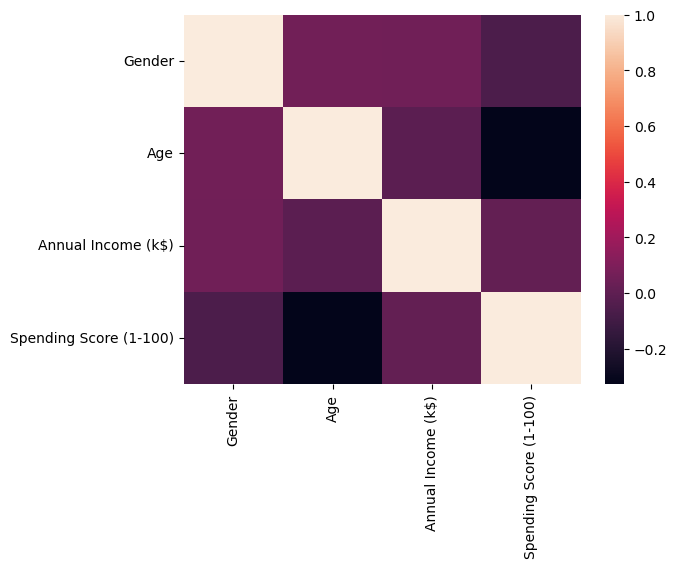

In [115]:
sns.heatmap(df_updated.corr())

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
X = df.drop(['CustomerID','Gender','Age'], axis='columns')
score = cross_val_score(km, X)

In [117]:
print("Cross Validation score = ", score)

Cross Validation score =  [-78293.84215304  -8595.88452551 -27018.63704882 -25999.61159289
 -65800.79944598]


In [118]:
cluster_assign = km.fit_predict(X)
cluster_assign

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [119]:
df['cluster'] = cluster_assign
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [120]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==2]

In [121]:
df0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

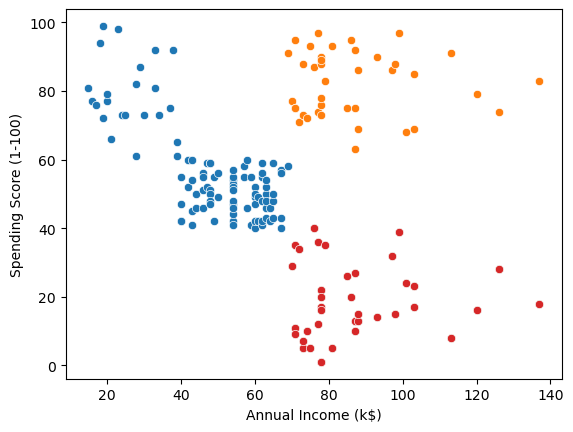

In [122]:
sns.scatterplot(data=df0, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', palette = 'tab10')
sns.scatterplot(data=df1, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', palette = 'tab10')
sns.scatterplot(data=df2, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', palette = 'tab10')
sns.scatterplot(data=df3, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', palette = 'tab10')

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Annual Income (k$)"] = scaler.fit_transform(df[["Annual Income (k$)"]])
df["Spending Score (1-100)"] = scaler.fit_transform(df[["Spending Score (1-100)"]])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,1
196,197,Female,45,0.909836,0.275510,2
197,198,Male,32,0.909836,0.744898,1
198,199,Male,32,1.000000,0.173469,2


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
X = df.drop(['CustomerID','Gender','Age', 'cluster'], axis='columns')

score = cross_val_score(km, X)
score

array([-6.46916434, -0.64916951, -2.05492248, -1.91639226, -4.94581888])

In [125]:
cluster_assign = km.fit_predict(X)
cluster_assign

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [126]:
km.cluster_centers_

array([[0.59016393, 0.17991407],
       [0.58638083, 0.82783883],
       [0.27262295, 0.56612245],
       [0.09265859, 0.20319432]])

In [127]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,1
196,197,Female,45,0.909836,0.275510,2
197,198,Male,32,0.909836,0.744898,1
198,199,Male,32,1.000000,0.173469,2


In [128]:
df['cluster'] = cluster_assign
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,1
196,197,Female,45,0.909836,0.275510,0
197,198,Male,32,0.909836,0.744898,1
198,199,Male,32,1.000000,0.173469,0


In [129]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
df3 = df[df['cluster']==3]

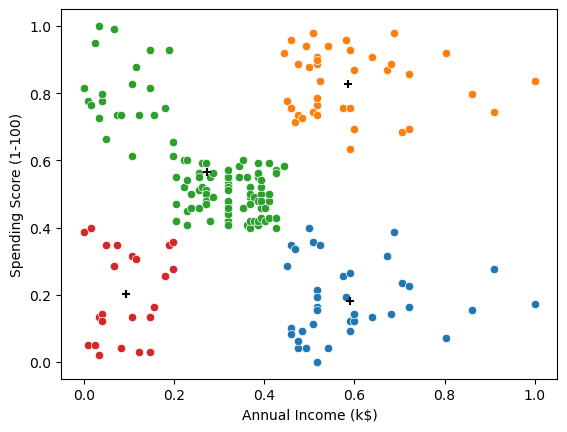

In [130]:
sns.scatterplot(data=df0, x='Annual Income (k$)', y='Spending Score (1-100)', palette='tab10')
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', palette='tab10')
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', palette='tab10')
sns.scatterplot(data=df3, x='Annual Income (k$)', y='Spending Score (1-100)', palette='tab10')

plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1], color = 'black', marker='+')

Text(0, 0.5, 'SSE')

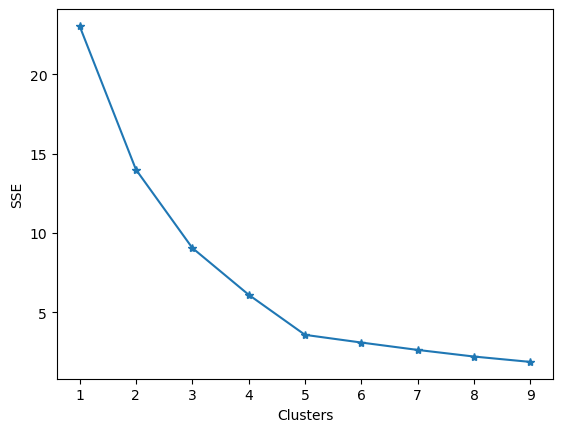

In [139]:
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1,10),sse, marker='*')
plt.xlabel('Clusters')
plt.ylabel('SSE')